
# **Import Libraries**

In [ ]:
from __future__ import print_function

import sklearn
import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import IPython
import matplotlib
import os
import cv2
import csv
import scipy.io

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import LabelEncoder, StandardScaler, SplineTransformer, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
from sklearn.base import TransformerMixin
from sklearn.compose import TransformedTargetRegressor
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---


## **import the dataset and preprocessing on it**

In [ ]:
# import the dataset
df = pd.read_csv('./titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [ ]:
print('Shape of Training dataset:', df.shape)

print('\ncolumns name:\n', df.columns)

print('\nnumber of Null Values in each column:\n', df.isnull().sum())

Shape of Training dataset: (887, 8)

columns name:
 Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

number of Null Values in each column:
 Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [ ]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


<ipython-input-13-1d0e65b33400>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

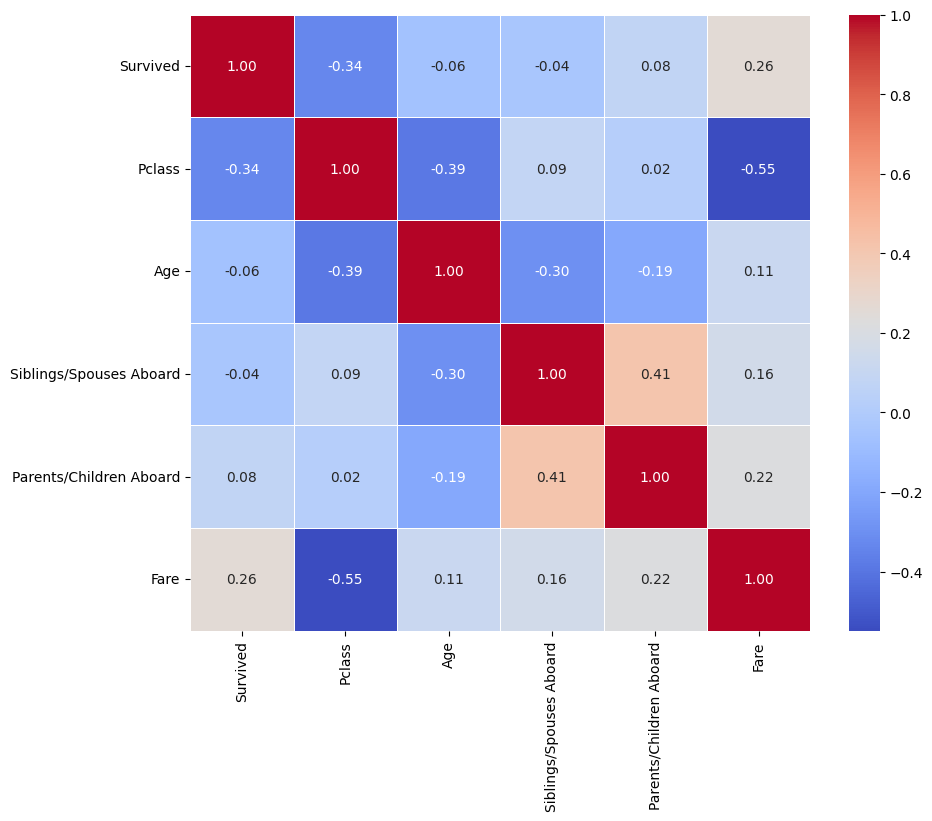

In [ ]:
# heatmap of correlation
corr = df.corr()
corr.shape

# print the results
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm',
            fmt='.2f', linewidths=0.5)

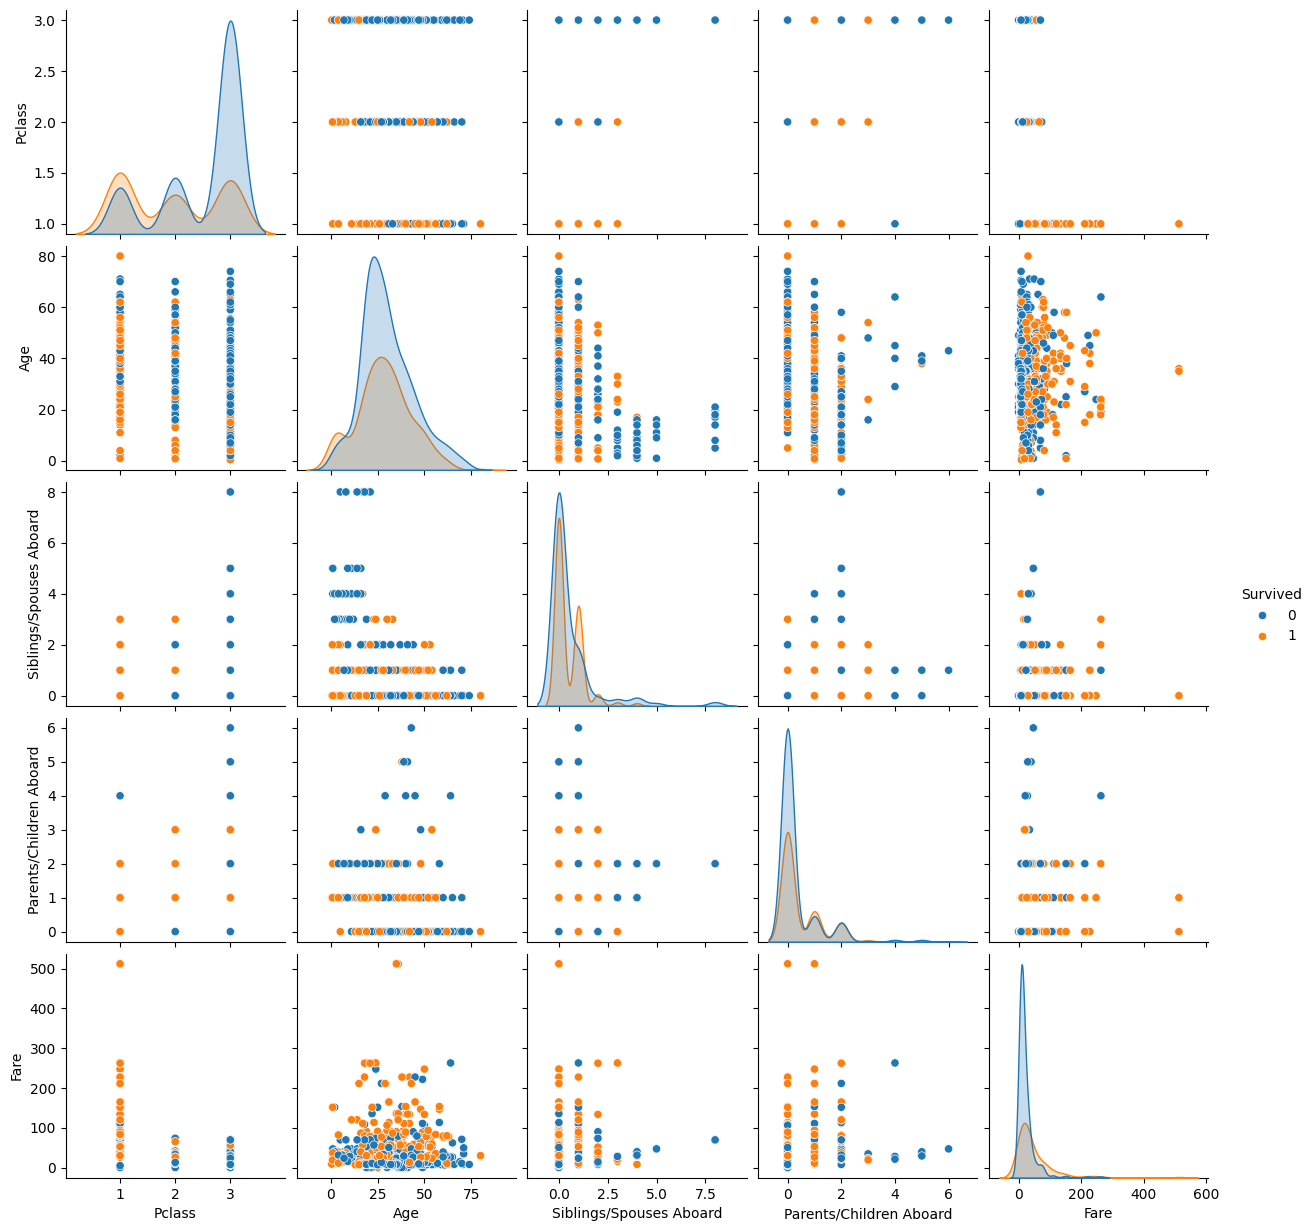

In [ ]:
# choose the numeric columns
numeric_columns = ['Survived', 'Pclass', 'Age',
                   'Siblings/Spouses Aboard',
                   'Parents/Children Aboard', 'Fare']
titanic_numeric = df[numeric_columns]

# pair plot for features
sns.pairplot(titanic_numeric, hue='Survived')
plt.show()

## **Separating Features from Target**

In [23]:
# save Survived column for y_target
y = df['Survived']

# features include all columns except 'Survived'
X = df.drop('Survived', axis=1)

## **Identifying and Removing Irrelevant Features**

Columns that are removed:

- **Name**: The name of a passenger is a unique identifier and does not provide quantitative data for survival analysis. It's more useful for identification purposes rather than predictive modeling.

- **Siblings/Spouses Aboard**: While family ties might have some impact on survival rates, the number of siblings or spouses aboard is a specific detail that may not have a strong direct correlation with survival when considered alone. It could be more relevant when combined with other family-related variables to create a feature representing the family size.

- **Parents/Children Aboard**: Similar to the siblings/spouses column, the number of parents or children aboard is a detail that might not independently influence survival chances. It could be part of a composite feature representing family size, but on its own, it may not be as predictive as other variables.

In [24]:
# choose the irrelevant features
irrelevant_features = ['Name', 'Siblings/Spouses Aboard',
                       'Parents/Children Aboard']

# remove irrevelant feature list from X
X = X.drop(irrelevant_features, axis=1)
print('The features after removing irrevelant ones:\n', X)

The features after removing irrevelant ones:
      Pclass     Sex   Age     Fare
0         3    male  22.0   7.2500
1         1  female  38.0  71.2833
2         3  female  26.0   7.9250
3         1  female  35.0  53.1000
4         3    male  35.0   8.0500
..      ...     ...   ...      ...
882       2    male  27.0  13.0000
883       1  female  19.0  30.0000
884       3  female   7.0  23.4500
885       1    male  26.0  30.0000
886       3    male  32.0   7.7500

[887 rows x 4 columns]


In [25]:
# convert male and female to one-hot
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
X

,Pclass,Age,Fare,Sex_male
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
882,2,27.0,13.0000,1
883,1,19.0,30.0000,0
884,3,7.0,23.4500,0
885,1,26.0,30.0000,1


## **Decision Tree**

### use decision tree classifier without any input parameters

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the model to find the best parameters
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the best parameters and accuracy
print("Accuracy:", accuracy)


Accuracy: 0.7677902621722846


### use parameters for decision tree classifier

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                        test_size=0.3, random_state=42)

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Different usable parameters for decision tree
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Use GridSearchCV for different parameters
grid_search = GridSearchCV(estimator=dt_classifier,
                        param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_dt_model = DecisionTreeClassifier(**best_params)
best_dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the best parameters and accuracy
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
Accuracy: 0.797752808988764


## **K-Fold Cross-Validation & Leave-One-Out**

Both methods are techniques used for assessing the performance of a machine learning model on a dataset. They help in obtaining a more reliable estimate of the model's performance than a single train-test split.

The choice between them depends on factors such as the size of the dataset and computational resources. K-fold cross-validation is often used when the dataset is larger, while leave-one-out cross-validation is useful for smaller datasets.

1. **K-Fold Cross-Validation**:

  In k-fold cross-validation, the dataset is divided into k equally-sized folds. The model is trained and evaluated k times, each time using a different fold as the test set and the remaining folds as the training set. The performance metrics are then averaged over the k iterations to get a more robust estimate of the model's performance.

  Steps for k-fold cross-validation:

   - Dataset Splitting:

     Divide the dataset into k folds (subsets) of roughly equal size.

   - Model Training and Evaluation:

    For each iteration (fold):
      - Train the model on k-1 folds.
      - Evaluate the model on the remaining 1 fold.
      - Record the performance metric (e.g., accuracy, precision, recall).

  - Performance Average:

    Calculate the average performance metric over all k iterations.


2. **Leave-One-Out Cross-Validation (LOOCV)**:

  In leave-one-out cross-validation, k is set to the number of instances in the dataset. This means that for each iteration, only one instance is used as the test set, and the model is trained on all other instances. LOOCV is computationally expensive but provides a less biased estimate of the model's performance, especially for small datasets.

  Steps for leave-one-out cross-validation:

  - Model Training and Evaluation:

    For each instance in the dataset:
     - Train the model on all instances except the current one.
     - Evaluate the model on the current instance.
     - Record the performance metric.
  Performance Average:

  - Calculate the average performance metric over all instances.

## **Model Evaluation & Cross-Validation**

The dataset that we have, is relatively small that leave one out could be used; But leave one out can be computationally expensive, as it requires training and evaluating the model as many times as there are instances in the dataset.

So, if we use k-fold cross validation with a moderate value of k, it would be a good compromise between bias and computational cost. It allows us to partition the data into k subsets, train and evaluate the model k times, and then average the performance metrics. This provides a more stable estimate of the model's performance compared to a single train-test split.

So we use **k-fold cross validation** with a moderate k equal to 10 (as the question said).

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Different usable parameters for decision tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Use GridSearchCV for different parameters and k-fold 10
grid_search = GridSearchCV(estimator=dt_classifier,
              param_grid=param_grid,
              cv=KFold(n_splits=10, shuffle=True, random_state=42),
              scoring='accuracy')

# Fit the model to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_dt_model = DecisionTreeClassifier(**best_params)
cv_scores = cross_val_score(best_dt_model, X_train, y_train,
            cv=KFold(n_splits=10, shuffle=True, random_state=42),
            scoring='accuracy')

# Make predictions
best_dt_model.fit(X_train, y_train)
y_pred_test = best_dt_model.predict(X_test)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print the results
print("Best Parameters:\n", best_params)
print("\nCross-Validation Scores:\n", cv_scores)
print("\nMean CV Accuracy:", cv_scores.mean())
print("\nAccuracy on Test Set:", accuracy_test)

Best Parameters:
 {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}

Cross-Validation Scores:
 [0.83870968 0.79032258 0.85483871 0.83870968 0.85483871 0.82258065
 0.79032258 0.83870968 0.77419355 0.85483871]

Mean CV Accuracy: 0.8258064516129032

Accuracy on Test Set: 0.8164794007490637
